Importing necessary libraries and packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings

In [2]:
warnings.filterwarnings("ignore")

Loading the dataset

In [3]:
df=pd.read_csv("MovieRating.csv",encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Describing the dataset

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Checking for missing values

In [6]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Checking for duplicate values

In [7]:
duplicate = df.loc[df.duplicated(subset = ['Name', 'Year'], keep = False)]
duplicate

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
585,Achanak,(1988),NaN,Thriller,NaN,NaN,Rakesh Kashyap,Om Puri,Kunickaa Sadanand,Kanwaljit Singh
586,Achanak,(1988),NaN,Drama,NaN,NaN,Kavi Raz,Alka,Amarjeet Kaur,Kavi Raz
953,Amrit,(1941),153 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
954,Amrit,(1941),162 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
1249,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1250,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1768,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
1769,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN


Removing duplicate values

In [8]:
df=df.drop_duplicates(subset = ['Name', 'Year'])

Dropping Name column

In [9]:
df=df.drop(["Name"],axis=1)

Formatting Year, Duration, Votes column

In [10]:
df["Year"]=df["Year"].str.replace("[^0-9]","",regex=True)
df["Duration"]=df["Duration"].str.replace(" min","")
df["Votes"]=df["Votes"].str.replace("[^0-9]","",regex=True)

In [11]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Due to the presence of 50% missing values, removing them is preferable as filling them may not yield accurate results.

In [12]:
df=df.dropna()

Checking the data types

In [13]:
df.dtypes

Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Converting Year, Duration, Votes into numeric data types

In [14]:
columns=['Year', 'Duration', 'Votes']
for column in columns:
    df[column]=df[column].astype(int)
df["Rating"]=df["Rating"].astype(float)

In [15]:
df.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Data Visualisation

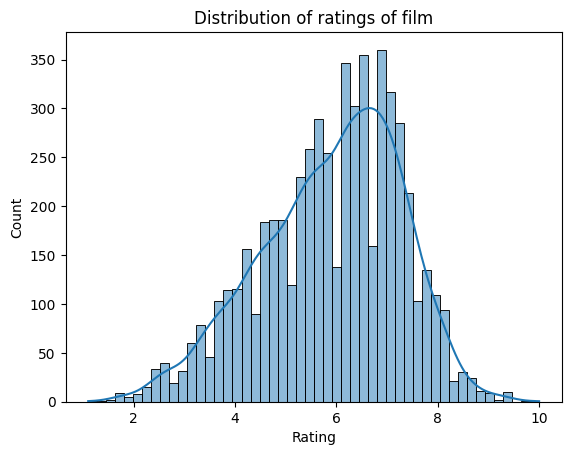

In [17]:
sns.histplot(data=df,x='Rating',bins=50,kde=True)
plt.title('Distribution of ratings of film')
plt.show()

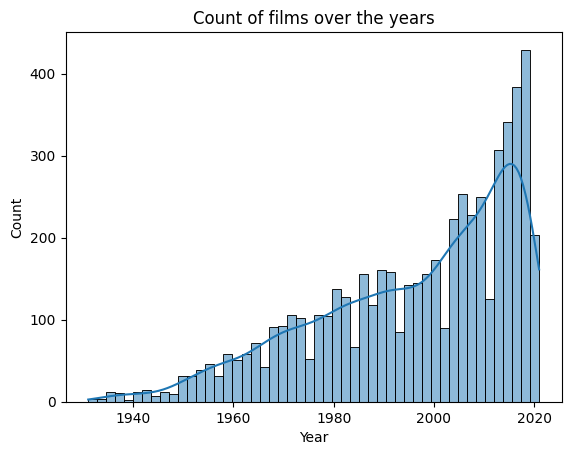

In [18]:
sns.histplot(data=df,x='Year',bins=50,kde=True)
plt.title('Count of films over the years')
plt.show()

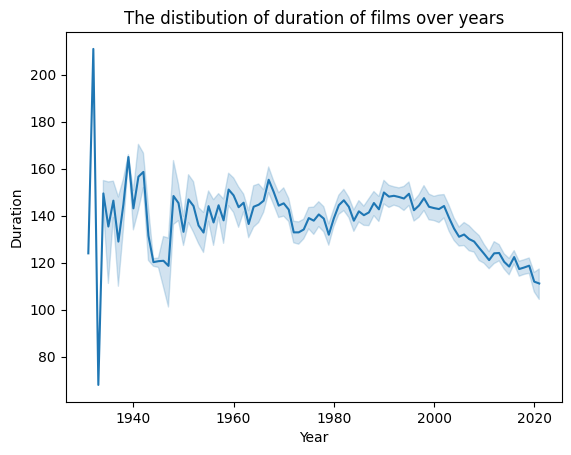

In [19]:
sns.lineplot(data=df,x='Year',y='Duration')
plt.title('The distibution of duration of films over years')
plt.show()

In [20]:
genre_count = pd.DataFrame(df["Genre"].value_counts().head(15)).reset_index()
genre_count.columns = ["Genre", "Count"]

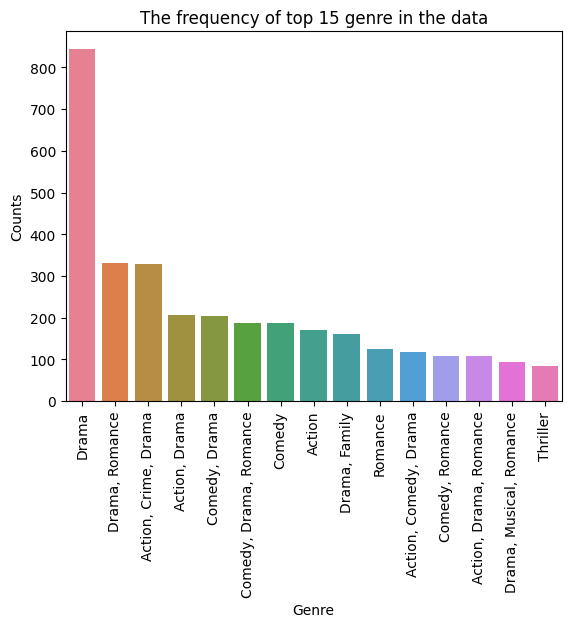

In [21]:
sns.barplot(x=genre_count["Genre"],y=genre_count["Count"],data=genre_count,hue=genre_count["Genre"])
plt.xticks(rotation=90)
plt.title('The frequency of top 15 genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [22]:
director_count = pd.DataFrame(df["Director"].value_counts().head(15)).reset_index()
director_count.columns = ["Director", "Count"]

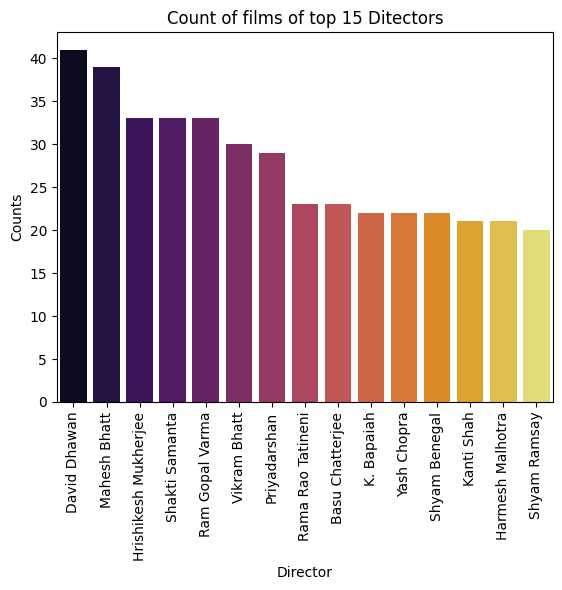

In [23]:
sns.barplot(x=director_count["Director"],y=director_count["Count"],data=director_count,palette="inferno")
plt.xticks(rotation=90)
plt.title('Count of films of top 15 Ditectors')
plt.xlabel('Director')
plt.ylabel('Counts')
plt.show()

In [24]:
actor_count = pd.DataFrame(df["Actor 1"].value_counts().head(15)).reset_index()
actor_count.columns = ["Actor 1", "Count"]

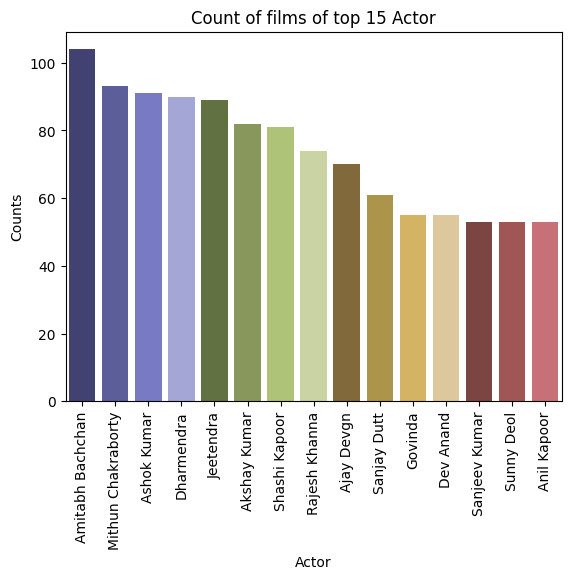

In [25]:
sns.barplot(x=actor_count["Actor 1"],y=actor_count["Count"],data=actor_count,palette="tab20b")
plt.xticks(rotation=90)
plt.title('Count of films of top 15 Actor')
plt.xlabel('Actor')
plt.ylabel('Counts')
plt.show()

In [26]:
actor_count = pd.DataFrame(df["Actor 2"].value_counts().head(15)).reset_index()
actor_count.columns = ["Actor 2", "Count"]

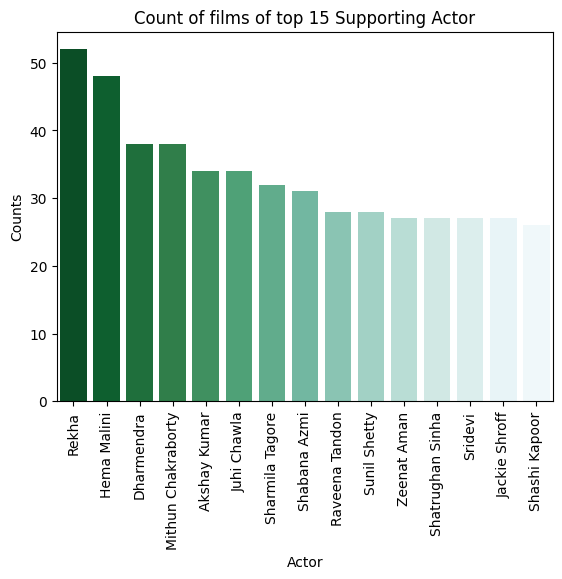

In [27]:
sns.barplot(x=actor_count["Actor 2"],y=actor_count["Count"],data=actor_count,palette="BuGn_r")
plt.xticks(rotation=90)
plt.title('Count of films of top 15 Supporting Actor')
plt.xlabel('Actor')
plt.ylabel('Counts')
plt.show()

In [28]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Creating encoding maps based on the average ratings

In [29]:
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

Mapping encoded values and rounding

In [31]:
df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map['Rating']),1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map['Rating']),1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map['Rating']),1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map['Rating']),1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map['Rating']),1)

In [32]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.8,7.0,7.0,7.0,6.4
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.4,4.4,4.4,4.4,5.7
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.8,5.8,5.9,5.3,6.2
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.4,6.9,6.5,7.4,6.8
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6,5.9,5.6,5.6,5.5


Dropping unwanted columns

In [33]:
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
df.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109,7.0,8,6.8,7.0,7.0,7.0,6.4
3,2019,110,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147,4.7,827,4.8,5.8,5.9,5.3,6.2
6,2005,142,7.4,1086,5.4,6.9,6.5,7.4,6.8
8,2012,82,5.6,326,5.6,5.9,5.6,5.6,5.5


Plotting Heatmap

<Axes: >

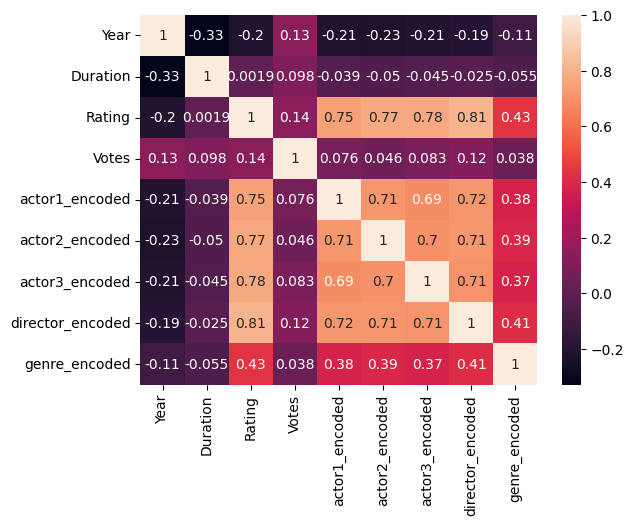

In [34]:
sns.heatmap(df.corr(),annot=True)

Splitting input and output

In [35]:
X=df.drop(['Rating'],axis=1).values
y=df.iloc[:,2]

Scaling input values

In [36]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


Splitting data for training and testing purpose

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.2)

Model building ( Linear Regression )

In [38]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Evaluating model performance

In [39]:
y_pred=model.predict(X_test)

In [40]:

print('r2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.7901748916867658
MAE: 0.4629269332934185
MSE: 0.38191635020952935
RMSE: 0.6179938108181419
